In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn import preprocessing

# 0. Datos

## 0.1. Lectura

In [2]:
df = pd.read_csv("/Users/aliciamuvi/Desktop/Kschool/tfm/datos/fraude.csv")

## 0.2. Exploración dataset

In [19]:
len(df)

6362620

In [21]:
df.shape

(6362620, 11)

Vemos que es un dataset con 6362620 observaciones y 11 variable

In [41]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [40]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1406563,139,CASH_OUT,156821.54,C1413073214,120456.0,0.00,C1212374426,0.00,156821.54,0,0
4221596,306,PAYMENT,3270.47,C852816734,11568.0,8297.53,M1623411514,0.00,0.00,0,0
6092609,522,CASH_OUT,54645.42,C1642731902,0.0,0.00,C1819221654,180602.75,235248.17,0,0
6203292,585,PAYMENT,8408.51,C1461655906,541.0,0.00,M1498572114,0.00,0.00,0,0
1234595,134,CASH_OUT,42312.56,C641485428,346945.0,304632.44,C1309136529,3972409.30,4014721.86,0,0


In [22]:
df.isnull().values.any()

False

In [26]:
df.isna().values.any()

False

Como se puede observar no hay ningún nulo ni na's.

## 0.3. Análisis de variables

In [39]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

### 0.3.1. Step (Unidad de tiempo)

Unidad de tiempo en el mundo real. En este caso 1 step es 1 hora de tiempo.

In [60]:
df.step.describe()

count    6.362620e+06
mean     2.433972e+02
std      1.423320e+02
min      1.000000e+00
25%      1.560000e+02
50%      2.390000e+02
75%      3.350000e+02
max      7.430000e+02
Name: step, dtype: float64

In [61]:
max(df.step)

743

Como vemos el máximo es 743, con lo que tenemos en total 30 días de datos.

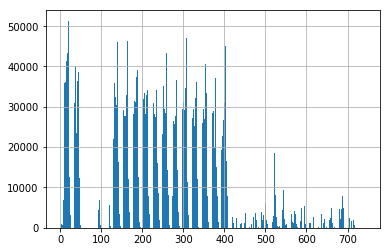

In [70]:
df.step.hist(bins=743)

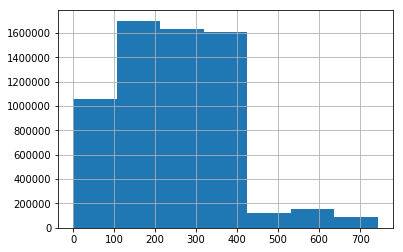

In [72]:
df.step.hist(bins=7)

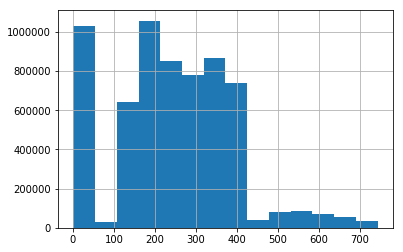

In [73]:
df.step.hist(bins=14)

Podemos verlo en función a las 24 horas del día, en vez de en las 743 horas de los datos que tenemos. Suponemos que la hora 1 es la 1 de la mañana, y la hora 24 las 12 de la noche.

In [4]:
df['hour_day'] = df.step%24

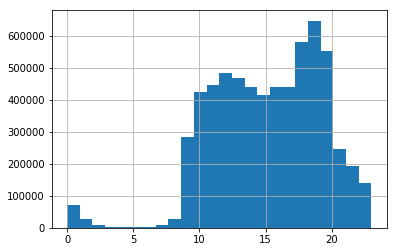

In [79]:
df.hour_day.hist(bins=24)

### 0.3.2. Type (Tipo de transacción)

In [44]:
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

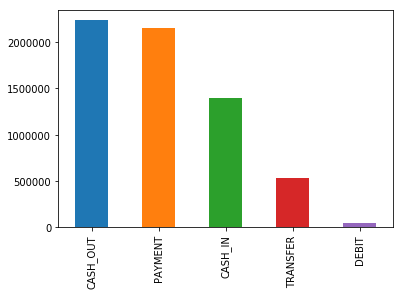

In [49]:
df.type.value_counts().plot(kind='bar')
plt.show()

In [3]:
df['type_num'] = np.where(df.type == 'CASH_OUT', 1,
                (np.where(df.type == 'PAYMENT',2,
                (np.where(df.type == 'CASH_IN',3,
                (np.where(df.type == 'TRANSFER',4,5)))))))

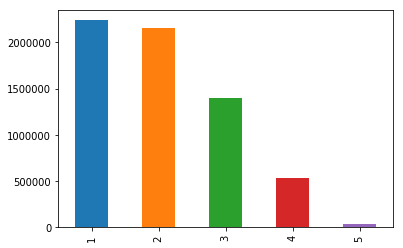

In [46]:
df.type_num.value_counts().plot(kind='bar')
plt.show()

### 0.3.3. Amount (Importe de dinero de la transacción)

In [80]:
df.amount.describe()

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

In [81]:
min(df.amount)

0.0

In [82]:
max(df.amount)

92445516.64

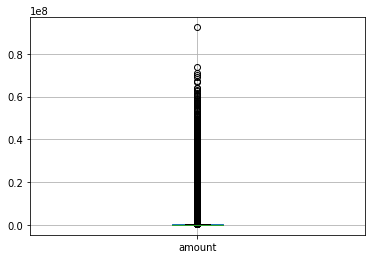

In [141]:
df.boxplot(column='amount')

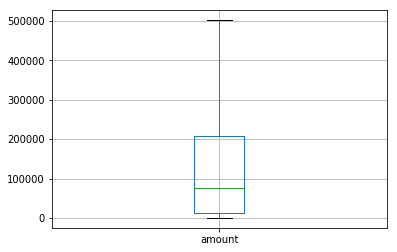

In [74]:
df.boxplot(column='amount',showfliers=False) #Quitamos el efecto de los outliers

6231994


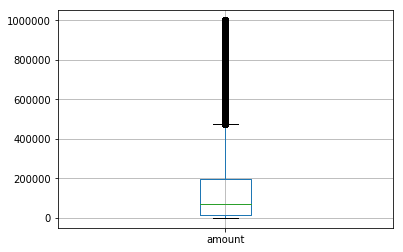

In [142]:
df[df['amount']< 1000000].boxplot(column='amount')
print(len(df[df['amount']< 1000000]))

6159292


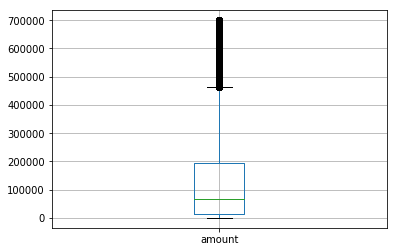

In [143]:
df[df['amount']< 700000].boxplot(column='amount')
print(len(df[df['amount']< 700000]))

6022336


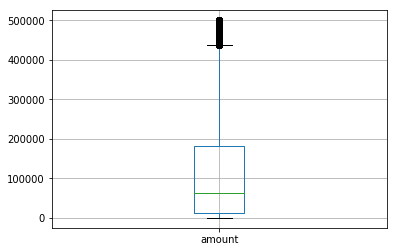

In [144]:
df[df['amount']< 500000].boxplot(column='amount')
print(len(df[df['amount']< 500000]))

130626


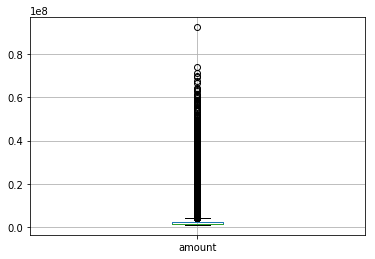

In [152]:
df[df['amount']>= 1000000].boxplot(column='amount')
print(len(df[df['amount']>= 1000000]))

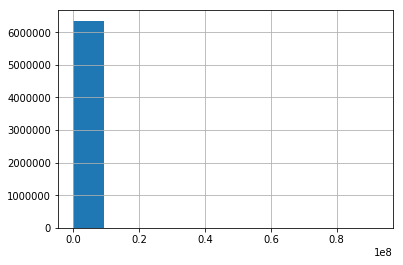

In [122]:
df.amount.hist(bins=10)

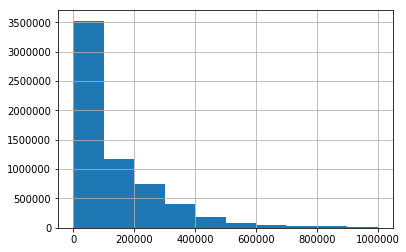

In [154]:
df[df['amount']< 1000000].amount.hist(bins=10)

### 0.3.4. NameOrig (persona que realiza la transacción)

In [166]:
print(df['nameOrig'].value_counts())

C2051359467    3
C545315117     3
C363736674     3
C1976208114    3
C1832548028    3
C1677795071    3
C1999539787    3
C1784010646    3
C1462946854    3
C400299098     3
C2098525306    3
C724452879     3
C1530544995    3
C1902386530    3
C1065307291    3
C1196698670    2
C554003234     2
C2103775239    2
C2062832097    2
C1827663900    2
C1760697536    2
C3327636       2
C1783224255    2
C404687241     2
C409995826     2
C441850653     2
C648580163     2
C1698468762    2
C1008581294    2
C1134720772    2
              ..
C136422916     1
C160298458     1
C866823120     1
C1417884909    1
C1986804560    1
C1347429151    1
C382564734     1
C89435286      1
C268899574     1
C205223136     1
C1704106326    1
C1334059522    1
C2014506100    1
C1530012520    1
C1140321359    1
C1975827306    1
C1427732457    1
C976074531     1
C1756747191    1
C1382060856    1
C1934568957    1
C436609695     1
C1485552141    1
C435398739     1
C1576103776    1
C472742350     1
C1795976921    1
C2127011604   

In [167]:
df['nameOrig'].value_counts().count()

6353307

Hay 6353307 personas diferentes. Recordemos que el conjunto total de datos tiene 6362620 registros

### 0.3.5. OldbalanceOrg (saldo inicial antes de la transacción)

In [174]:
df.oldbalanceOrg.describe()

count    6.362620e+06
mean     8.338831e+05
std      2.888243e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.420800e+04
75%      1.073152e+05
max      5.958504e+07
Name: oldbalanceOrg, dtype: float64

In [175]:
min(df.oldbalanceOrg)

0.0

In [176]:
max(df.oldbalanceOrg)

59585040.37

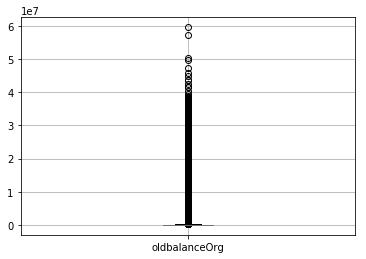

In [177]:
df.boxplot(column='oldbalanceOrg')

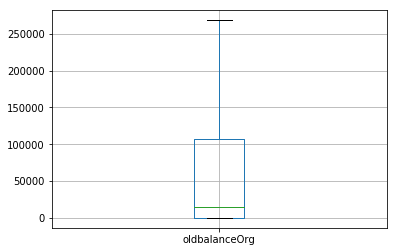

In [73]:
df.boxplot(column='oldbalanceOrg',showfliers=False) #Quitamos el efecto de los outliers

5477523


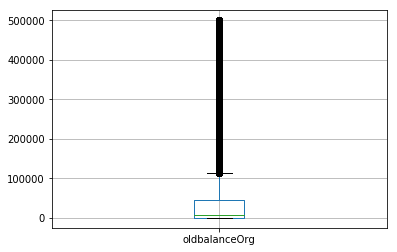

In [182]:
df[df['oldbalanceOrg']< 500000].boxplot(column='oldbalanceOrg')
print(len(df[df['oldbalanceOrg']< 500000]))

5561533


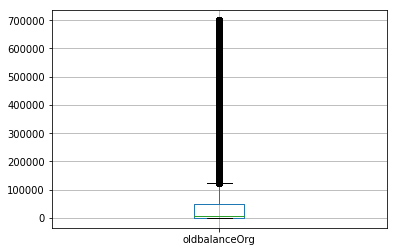

In [183]:
df[df['oldbalanceOrg']< 700000].boxplot(column='oldbalanceOrg')
print(len(df[df['oldbalanceOrg']< 700000]))

5628097


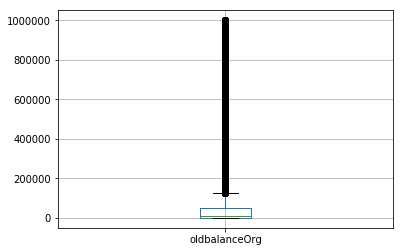

In [178]:
df[df['oldbalanceOrg']< 1000000].boxplot(column='oldbalanceOrg')
print(len(df[df['oldbalanceOrg']< 1000000]))

734523


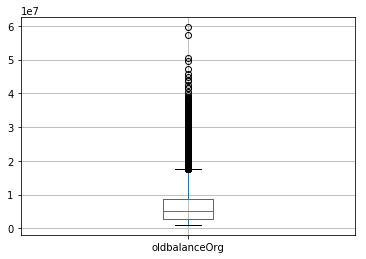

In [184]:
df[df['oldbalanceOrg']>= 1000000].boxplot(column='oldbalanceOrg')
print(len(df[df['oldbalanceOrg']>= 1000000]))

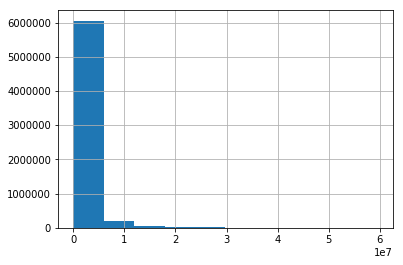

In [185]:
df.oldbalanceOrg.hist(bins=10)

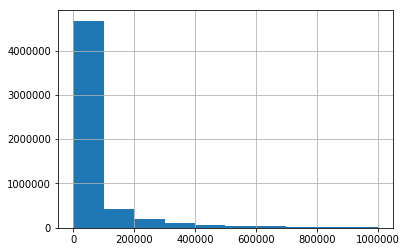

In [204]:
df[df['oldbalanceOrg']< 1000000].oldbalanceOrg.hist(bins=10)

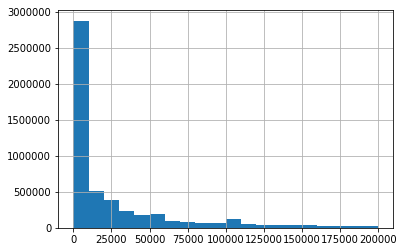

In [206]:
df[df['oldbalanceOrg']< 200000].oldbalanceOrg.hist(bins=20)

### 0.3.6. NewbalanceOrig (nuevo saldo después de la transacción)

In [194]:
df.newbalanceOrig.describe()

count    6.362620e+06
mean     8.551137e+05
std      2.924049e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.442584e+05
max      4.958504e+07
Name: newbalanceOrig, dtype: float64

In [195]:
min(df.newbalanceOrig)

0.0

In [196]:
max(df.newbalanceOrig)

49585040.37

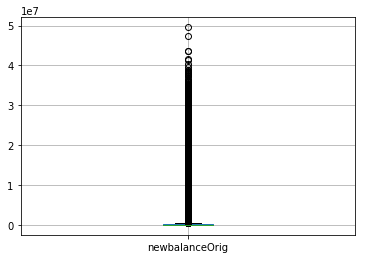

In [197]:
df.boxplot(column='newbalanceOrig')

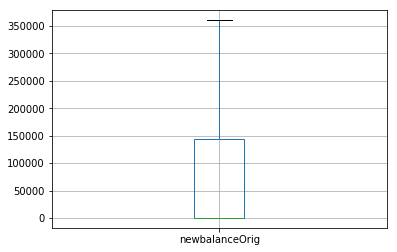

In [72]:
df.boxplot(column='newbalanceOrig',showfliers=False) #Quitamos el efecto de los outliers

5452817


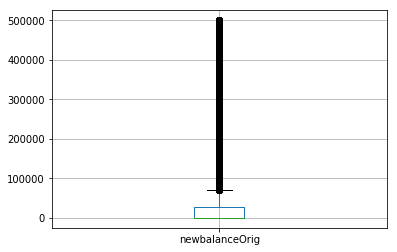

In [198]:
df[df['newbalanceOrig']< 500000].boxplot(column='newbalanceOrig')
print(len(df[df['newbalanceOrig']< 500000]))

5545302


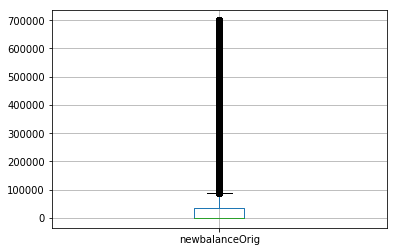

In [199]:
df[df['newbalanceOrig']< 700000].boxplot(column='newbalanceOrig')
print(len(df[df['newbalanceOrig']< 700000]))

5610068


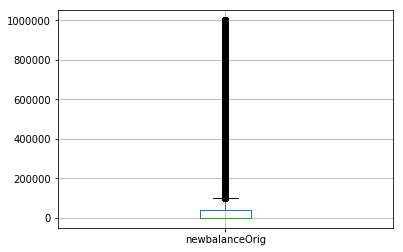

In [200]:
df[df['newbalanceOrig']< 1000000].boxplot(column='newbalanceOrig')
print(len(df[df['newbalanceOrig']< 1000000]))

752552


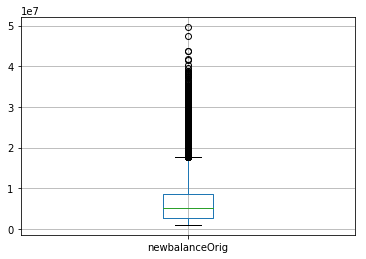

In [201]:
df[df['newbalanceOrig']>= 1000000].boxplot(column='newbalanceOrig')
print(len(df[df['newbalanceOrig']>= 1000000]))

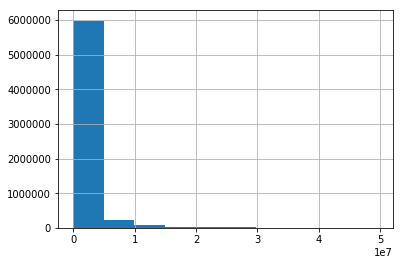

In [202]:
df.newbalanceOrig.hist(bins=10)

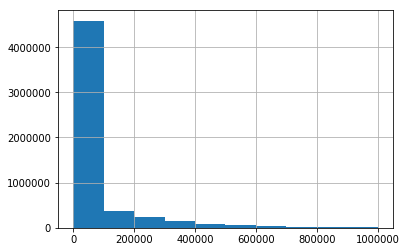

In [15]:
df[df['newbalanceOrig']< 1000000].newbalanceOrig.hist(bins=10)

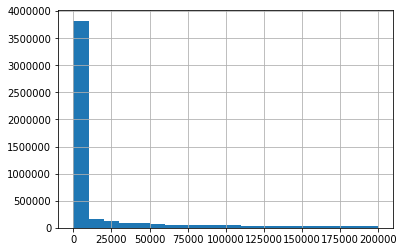

In [207]:
df[df['newbalanceOrig']< 200000].newbalanceOrig.hist(bins=20)

Calculemos la diferencia entre **newbalanceOrg** y **oldbalanceOrig**. Veamos su comportamiento.

In [4]:
df['difbalanceOrig'] = df.newbalanceOrig - df.oldbalanceOrg

In [208]:
df.difbalanceOrig.describe()

count    6.362620e+06
mean     2.123056e+04
std      1.466433e+05
min     -1.000000e+07
25%     -1.015044e+04
50%      0.000000e+00
75%      0.000000e+00
max      1.915268e+06
Name: difbalanceOrig, dtype: float64

In [48]:
min(df.difbalanceOrig)

-10000000.000000004

In [210]:
max(df.difbalanceOrig)

1915267.9000000022

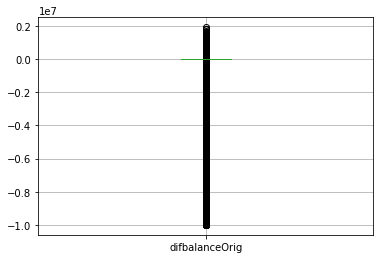

In [211]:
df.boxplot(column='difbalanceOrig')

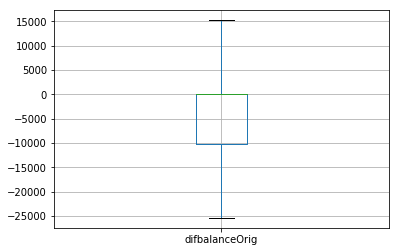

In [71]:
df.boxplot(column='difbalanceOrig',showfliers=False) #Quitamos el efecto de los outliers

4963367


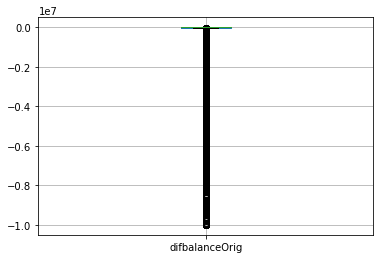

In [212]:
df[df['difbalanceOrig']<= 0].boxplot(column='difbalanceOrig')
print(len(df[df['difbalanceOrig']<= 0]))

1399253


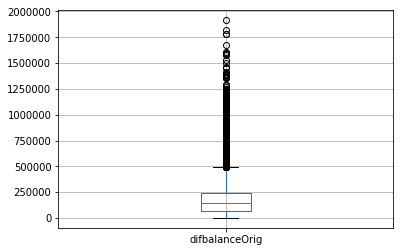

In [213]:
df[df['difbalanceOrig']> 0].boxplot(column='difbalanceOrig')
print(len(df[df['difbalanceOrig']> 0]))

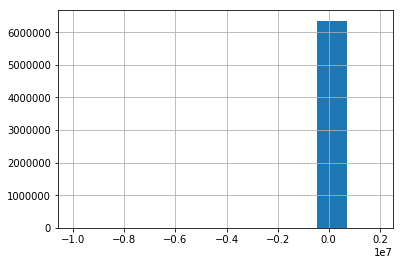

In [214]:
df.difbalanceOrig.hist(bins=10)

2874330


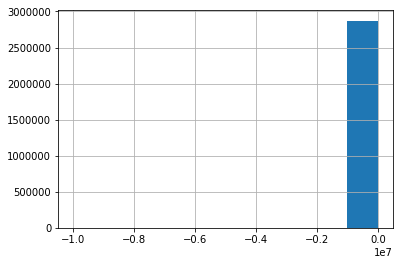

In [215]:
df[df['difbalanceOrig']< 0].difbalanceOrig.hist(bins=10)
print(len(df[df['difbalanceOrig']< 0]))

1399253


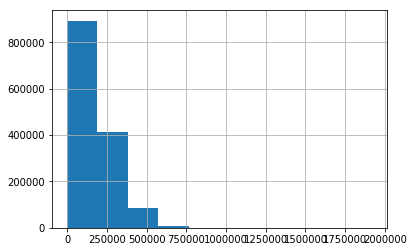

In [217]:
df[df['difbalanceOrig']> 0].difbalanceOrig.hist(bins=10)
print(len(df[df['difbalanceOrig']> 0]))

In [219]:
print(len(df[df['difbalanceOrig']== 0]))

2089037


Creamos una variable categórica, que valga -1, 0, 1 en función de si la diferencia es menor que 1, 0 o mayor que 1.

In [5]:
df['difbalanceOrig_cat'] = np.where(df['difbalanceOrig'] < 0, -1, np.where(df['difbalanceOrig']>0,1,0))

In [221]:
df.difbalanceOrig_cat.value_counts()

-1    2874330
 0    2089037
 1    1399253
Name: difbalanceOrig_cat, dtype: int64

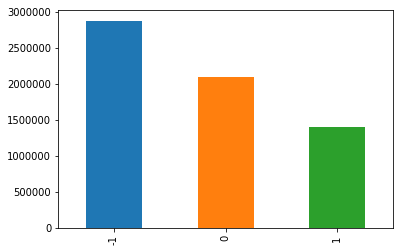

In [222]:
df.difbalanceOrig_cat.value_counts().plot(kind='bar')
plt.show()

Hay muchos más casos en los que el saldo de la persona que envia antes de la transacción es mayor que el de después de la transacción.

### 0.3.7. NameDest (cliente destinatario de la transacción)

In [209]:
print(df['nameDest'].value_counts())

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C1590550415    101
C248609774     101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
C977993101      96
C97730845       96
C392292416      95
C1899073220     92
C306206744      91
C1234776885     90
C1782113663     90
C998351292      89
C716083600      89
C909295153      88
C667346055      86
C1674899618     86
C1262822392     85
C453211571      84
C1255024717     84
C1816757085     84
C2006081398     83
C932583850      82
C991363637      82
C1504109395     82
              ... 
M420550795       1
M539333233       1
M1344785792      1
M1838461347      1
M1667918131      1
M872122459       1
M854222057       1
M1097038647      1
M816764861       1
M219546462       1
M1553768919      1
M1346935395      1
M397424585       1
M1479698946      1
M510236792       1
M1025783267      1
M627453796       1
M143918086       1
M1447395365      1
M870218775       1
M327559545       1
M1451844949 

In [210]:
df['nameDest'].value_counts().count()

2722362

Hay 2722362 personas diferentes. Recordemos que el conjunto total de datos tiene 6362620 registros y hay 6353307 personas diferentes que envian transacciones.

Los clientes que empiezan por la letra M, son comerciantes. Para estos comerciantes no se tiene información del saldo inicial y del saldo final. 

In [216]:
df[df.nameDest.str.slice(0, 1) == 'M'].nameDest.count()

2151495

Hay 2151495 comerciantes destinatarios de la transacción. 

In [6]:
df_noM = df[df.nameDest.str.slice(0, 1) == 'C']

In [7]:
df_M = df[df.nameDest.str.slice(0, 1) == 'M']

Creamos una variable que vale 1 si la persona destinataria es comerciante y 0 en otro caso.

In [8]:
df['comerciante'] = np.where(df.nameDest.str.slice(0, 1) == 'M', 1, 0)

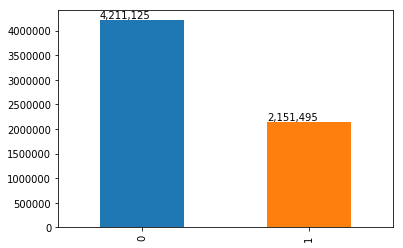

In [11]:
graf = df.comerciante.value_counts().plot(kind='bar')
for p in graf.patches:
    graf.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

Vemos como hay bastantes destinatarios comerciantes, aunque la mayoría no lo son.

In [21]:
print('Un ',"{0:.2f}".format(100 * (len(df[df['comerciante'] == 1]) / len(df))),'% de los destinatarios son comerciantes') 

Un  33.81 % de los destinatarios son comerciantes


### 0.3.8. OldbalanceDest (saldo inicial de la persona destinaria de la transacción)
Hay que tener en cuenta que no hay información para las personas que comienzan con M (Comerciantes).

Hagamos el estudio de la variable solo para los NO comerciantes (df_noM), ya que para los comerciantes esta variable está a 0.

In [235]:
len(df_noM)

4211125

In [226]:
df_noM.oldbalanceDest.describe()

count    4.211125e+06
mean     1.663058e+06
std      4.064780e+06
min      0.000000e+00
25%      1.396590e+05
50%      5.512472e+05
75%      1.692951e+06
max      3.560159e+08
Name: oldbalanceDest, dtype: float64

In [227]:
min(df_noM.oldbalanceDest)

0.0

In [231]:
max(df_noM.oldbalanceDest)

356015889.35

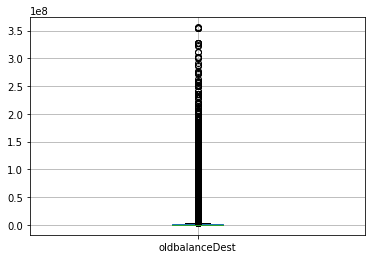

In [230]:
df_noM.boxplot(column='oldbalanceDest')

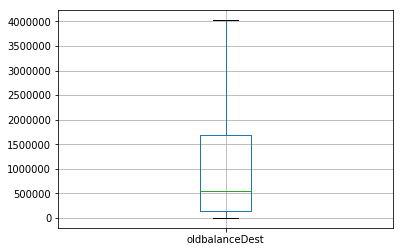

In [70]:
df_noM.boxplot(column='oldbalanceDest',showfliers=False) #Quitamos el efecto de los outliers

4103780


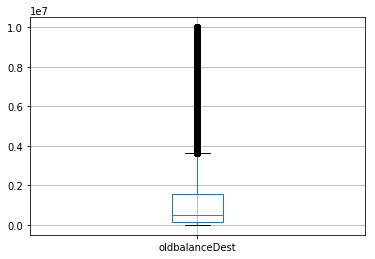

In [245]:
df_noM[df_noM['oldbalanceDest']< 10000000].boxplot(column='oldbalanceDest')
print(len(df_noM[df_noM['oldbalanceDest']< 10000000]))

107345


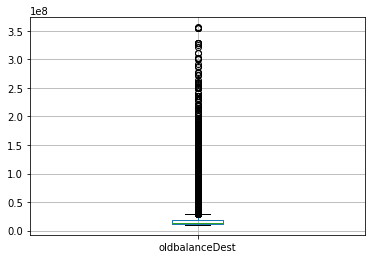

In [246]:
df_noM[df_noM['oldbalanceDest']>= 10000000].boxplot(column='oldbalanceDest')
print(len(df_noM[df_noM['oldbalanceDest']>= 10000000]))

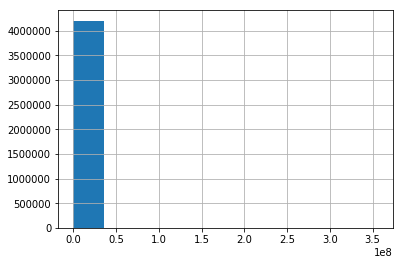

In [239]:
df_noM.oldbalanceDest.hist(bins=10)

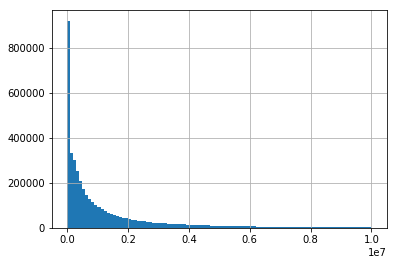

In [11]:
df_noM[df_noM['oldbalanceDest']< 10000000].oldbalanceDest.hist(bins=100)

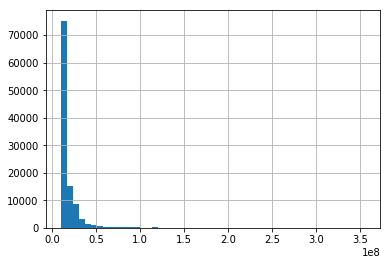

In [12]:
df_noM[df_noM['oldbalanceDest']>= 10000000].oldbalanceDest.hist(bins=50)

### 0.3.9. NewbalanceDest (saldo nuevo de la persona destinataria de la transacción)
Hay que tener en cuenta que no hay información para los clientes que comienzan con M (Comerciantes).

Hagamos el estudio de la variable solo para los NO comerciantes, ya que para los comerciantes esta variable está a 0.

In [235]:
len(df_noM)

4211125

In [250]:
df_noM.newbalanceDest.describe()

count    4.211125e+06
mean     1.850856e+06
std      4.386080e+06
min      0.000000e+00
25%      2.217176e+05
50%      6.837248e+05
75%      1.910979e+06
max      3.561793e+08
Name: newbalanceDest, dtype: float64

In [251]:
min(df_noM.newbalanceDest)

0.0

In [252]:
max(df_noM.newbalanceDest)

356179278.92

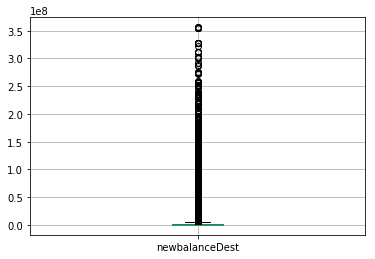

In [253]:
df_noM.boxplot(column='newbalanceDest')

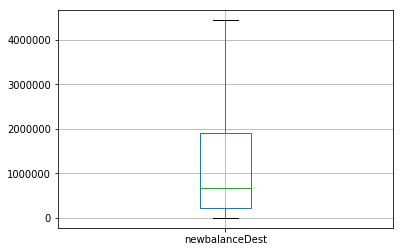

In [69]:
df_noM.boxplot(column='newbalanceDest',showfliers=False) #Quitamos el efecto de los outliers

4092137


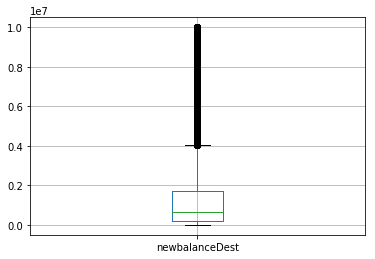

In [256]:
df_noM[df_noM['newbalanceDest']< 10000000].boxplot(column='newbalanceDest')
print(len(df_noM[df_noM['newbalanceDest']< 10000000]))

118988


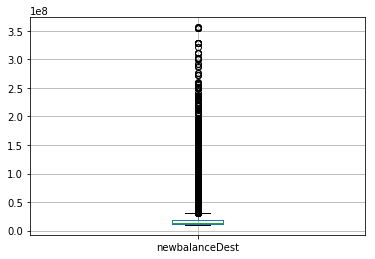

In [257]:
df_noM[df_noM['newbalanceDest']>= 10000000].boxplot(column='newbalanceDest')
print(len(df_noM[df_noM['newbalanceDest']>= 10000000]))

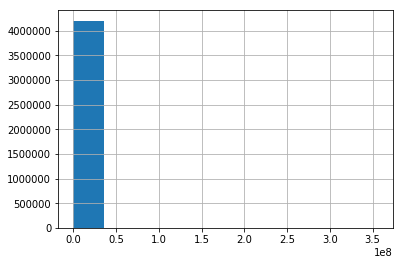

In [7]:
df_noM.newbalanceDest.hist(bins=10)

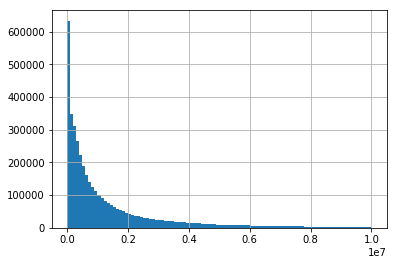

In [8]:
df_noM[df_noM['newbalanceDest']< 10000000].newbalanceDest.hist(bins=100)

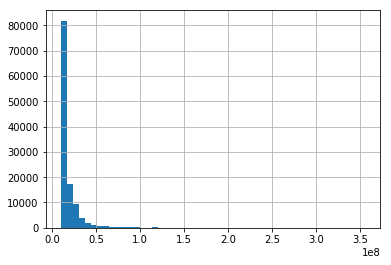

In [10]:
df_noM[df_noM['newbalanceDest']>= 10000000].newbalanceDest.hist(bins=50)

Calculemos la diferencia entre **newbalanceDest** y **oldbalanceDest**. Veamos su comportamiento.

In [9]:
df['difbalanceDest'] = df.newbalanceDest - df.oldbalanceDest

In [224]:
df.difbalanceDest.describe()

count    6.362620e+06
mean     1.242947e+05
std      8.129391e+05
min     -1.306083e+07
25%      0.000000e+00
50%      0.000000e+00
75%      1.491054e+05
max      1.056878e+08
Name: difbalanceDest, dtype: float64

In [225]:
min(df.difbalanceDest)

-13060826.21

In [226]:
max(df.difbalanceDest)

105687838.82000001

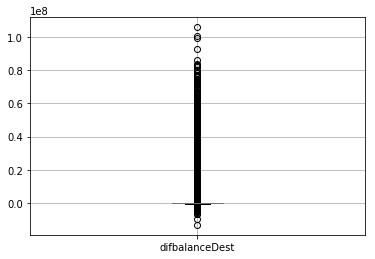

In [227]:
df.boxplot(column='difbalanceDest')

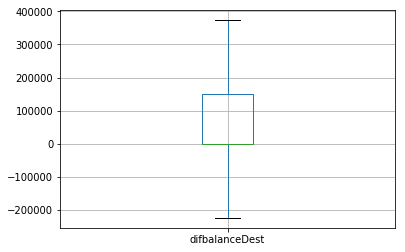

In [68]:
df.boxplot(column='difbalanceDest',showfliers=False) #Quitamos el efecto de los outliers

3556156


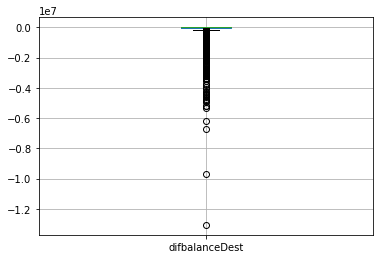

In [228]:
df[df['difbalanceDest']<= 0].boxplot(column='difbalanceDest')
print(len(df[df['difbalanceDest']<= 0]))

2806464


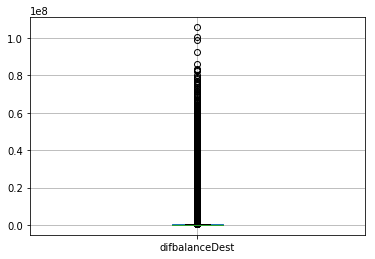

In [229]:
df[df['difbalanceDest']> 0].boxplot(column='difbalanceDest')
print(len(df[df['difbalanceDest']> 0]))

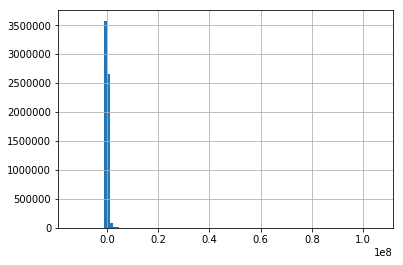

In [230]:
df.difbalanceDest.hist(bins=100)

1238864


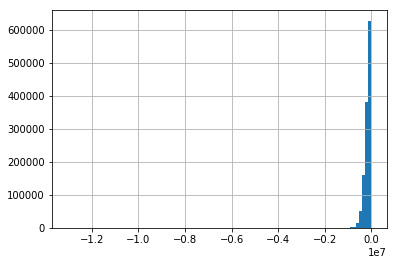

In [231]:
df[df['difbalanceDest']< 0].difbalanceDest.hist(bins=100)
print(len(df[df['difbalanceDest']< 0]))

2806464


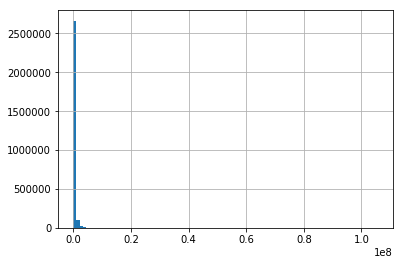

In [232]:
df[df['difbalanceDest']> 0].difbalanceDest.hist(bins=100)
print(len(df[df['difbalanceDest']> 0]))

In [233]:
print(len(df[df['difbalanceDest']== 0]))

2317292


Creamos una variable categórica, que valga -1, 0, 1 en función de si la diferencia es menor que 1, 0 o mayor que 1.

In [10]:
df['difbalanceDest_cat'] = np.where(df['difbalanceDest'] < 0, -1, np.where(df['difbalanceDest']>0,1,0))

In [235]:
df.difbalanceDest_cat.value_counts()

 1    2806464
 0    2317292
-1    1238864
Name: difbalanceDest_cat, dtype: int64

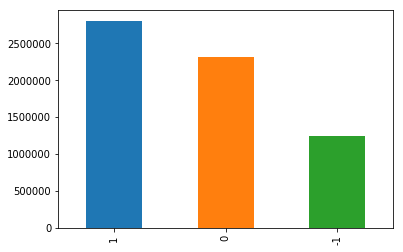

In [236]:
df.difbalanceDest_cat.value_counts().plot(kind='bar')
plt.show()

Hay muchos más casos en los que el saldo del destinatario antes de la transacción es menor que el de después de la transacción.

### 0.3.10. IsFraud (transacciones fraudulentas)
Este es el target 

In [16]:
print(df['isFraud'].value_counts())

0    6354407
1       8213
Name: isFraud, dtype: int64


In [23]:
100 * df['isFraud'].value_counts()[1] / (len(df))

0.12908204481801522

In [25]:
print('Hay un ',"{0:.4f}".format(100 * df['isFraud'].value_counts()[1] / (len(df))),'% de fraude') 

Hay un  0.1291 % de fraude


Este es el porcentaje de 1's de nuestra muestra (que cometen fraude)

In [26]:
100 * df['isFraud'].value_counts()[0] / (len(df))

99.87091795518198

In [27]:
print('Hay un ',"{0:.4f}".format(100 * df['isFraud'].value_counts()[0] / (len(df))),'% de no fraude') 

Hay un  99.8709 % de no fraude


Este es el porcentaje de 0's de nuestra muestra (que no cometen fraude)

Veamoslo ahora gráficamente

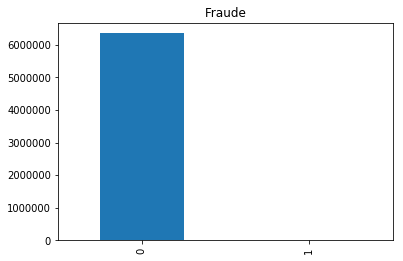

In [25]:
df.isFraud.value_counts().sort_index().plot(kind='bar', title="Fraude")
plt.show()

Como vemos el porcentaje de fraude en la muestra es muy muy bajo, por lo que aplicaré alguna técnica estadística que nos permita cambiar este porcentaje para obtener mejores modelos(sobre muestreo, bajo muestreo, ...)

### 0.3.11. IsFlaggedFraud
Son transacciones que por términos legales se han detectado a tiempo que son fraudulentas y se han podido parar.

In [33]:
print(df['isFlaggedFraud'].value_counts())

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64


Como vemos solo hay 16 casos de 1's. Esta variable no será introducida en el modelo.

## 0.4. Relación de variables con el target

### 0.4.1. isFraud VS step

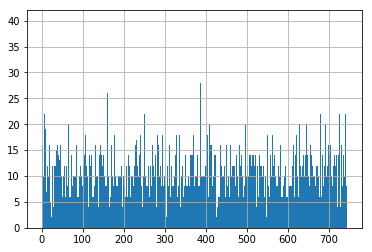

In [54]:
df[df.isFraud == 1].step.hist(bins=743)

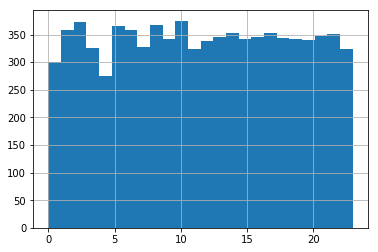

In [50]:
df[df.isFraud == 1].hour_day.hist(bins=24)

Gráficamente no se aprecia ningún step y ninguna hora en la que se produzca más fraude que en otros.

### 0.4.2. isFraud VS type

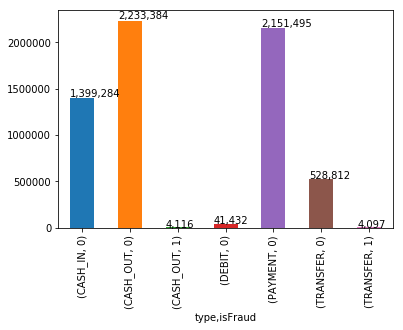

In [58]:
graf = df.groupby(['type', 'isFraud']).size().plot(kind='bar')
for p in graf.patches:
    graf.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

Podemos observar:
 - No hay fraude en type = CASH_IN ni type = DEBIT.
 - Solo type = CASH_OUT y type = TRANSFER tienen fraudes.
 - De estas dos que presentan fraude, no hay una que predomine sobre la otra.

Creamos una variable que valga **1** cuando type = CASH_OUT y type = TRANSFER y **0** en otro caso.

In [11]:
df['type_cat'] = np.where(df.type == 'CASH_OUT',1,(np.where(df.type == 'TRANSFER',1,0)))

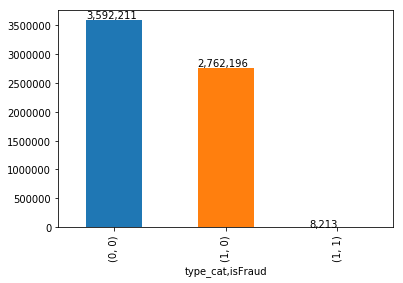

In [285]:
graf = df.groupby(['type_cat', 'isFraud']).size().plot(kind='bar')
for p in graf.patches:
    graf.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

Debido a que en solo dos de las categoría hay presencia de fraude, utilizaremos los datos que presenten una de esas dos categorías.

### 0.4.3. isFraud VS Amount

In [93]:
df[df.isFraud == 1].amount.describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

In [94]:
df[df.isFraud == 0].amount.describe()

count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64

In [98]:
max(df[df.isFraud == 0].amount)

92445516.64

In [97]:
max(df[df.isFraud == 1].amount)

10000000.0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10f854630>,
      dtype=object)

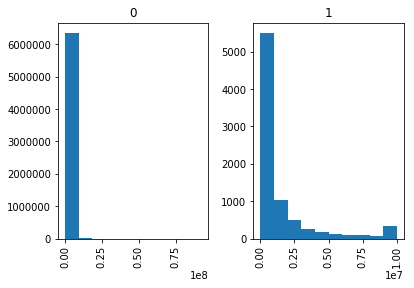

In [73]:
df.hist(column = "amount", by = "isFraud",bins=10)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10f0d1f98>,
      dtype=object)

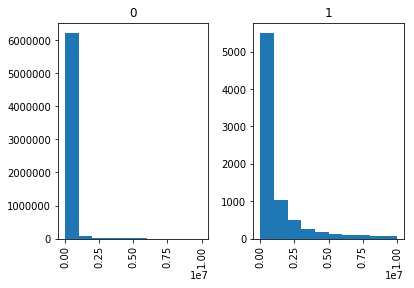

In [101]:
df[df['amount']< 10000000].hist(column = "amount", by = "isFraud",bins=10)

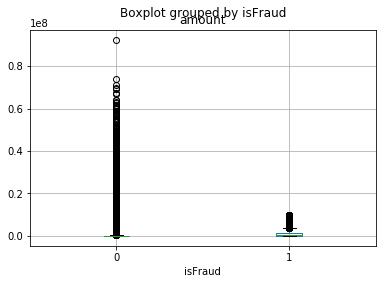

In [77]:
df.boxplot(column='amount',by = "isFraud")

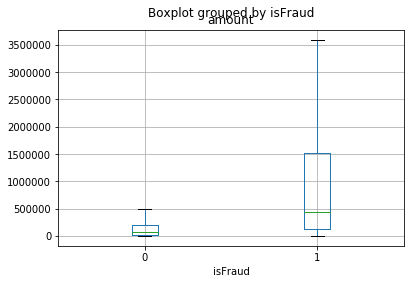

In [66]:
df.boxplot(column='amount',by="isFraud",showfliers=False) #Quitamos el efecto de los outliers

Vemos que el máximo importe en los fraudes es de 10M. 

### 0.3.4. isFraud VS oldbalanceOrg

In [110]:
df[df.isFraud == 1].oldbalanceOrg.describe()

count    8.213000e+03
mean     1.649668e+06
std      3.547719e+06
min      0.000000e+00
25%      1.258224e+05
50%      4.389835e+05
75%      1.517771e+06
max      5.958504e+07
Name: oldbalanceOrg, dtype: float64

In [111]:
df[df.isFraud == 0].oldbalanceOrg.describe()

count    6.354407e+06
mean     8.328287e+05
std      2.887144e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.406900e+04
75%      1.069695e+05
max      4.381886e+07
Name: oldbalanceOrg, dtype: float64

In [112]:
max(df[df.isFraud == 0].oldbalanceOrg)

43818855.3

In [113]:
max(df[df.isFraud == 1].oldbalanceOrg)

59585040.37

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10da2af98>,
      dtype=object)

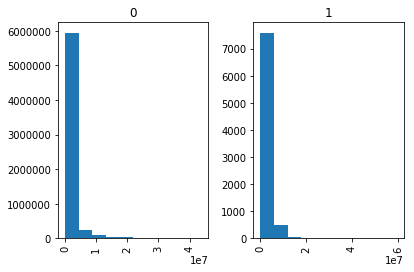

In [114]:
df.hist(column = "oldbalanceOrg", by = "isFraud",bins=10)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10dd93f28>,
      dtype=object)

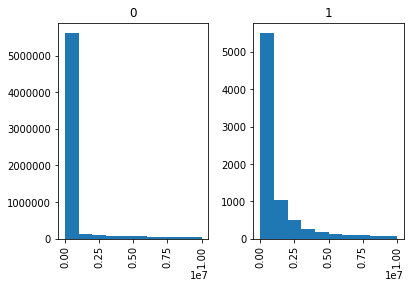

In [115]:
df[df['oldbalanceOrg']< 10000000].hist(column = "oldbalanceOrg", by = "isFraud",bins=10)

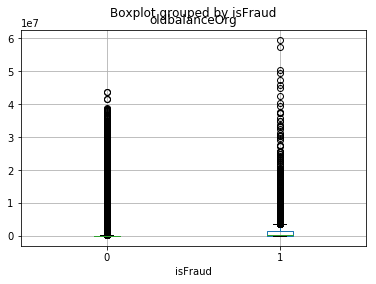

In [116]:
df.boxplot(column='oldbalanceOrg',by = "isFraud")

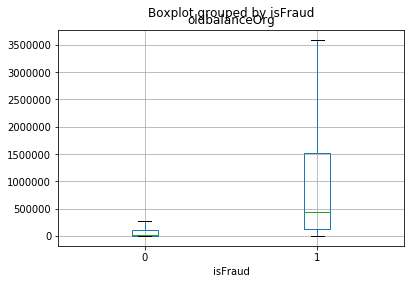

In [65]:
df.boxplot(column='oldbalanceOrg',by="isFraud",showfliers=False) #Quitamos el efecto de los outliers

### 0.4.5. isFraude VS newbalanceOrig

In [118]:
df[df.isFraud == 1].newbalanceOrig.describe()

count    8.213000e+03
mean     1.923926e+05
std      1.965666e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.958504e+07
Name: newbalanceOrig, dtype: float64

In [119]:
df[df.isFraud == 0].newbalanceOrig.describe()

count    6.354407e+06
mean     8.559702e+05
std      2.924987e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.447307e+05
max      4.368662e+07
Name: newbalanceOrig, dtype: float64

In [120]:
max(df[df.isFraud == 0].newbalanceOrig)

43686616.33

In [121]:
max(df[df.isFraud == 1].newbalanceOrig)

49585040.37

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10e03d358>,
      dtype=object)

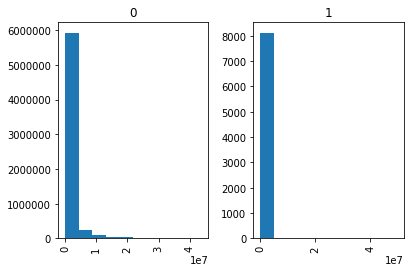

In [122]:
df.hist(column = "newbalanceOrig", by = "isFraud",bins=10)

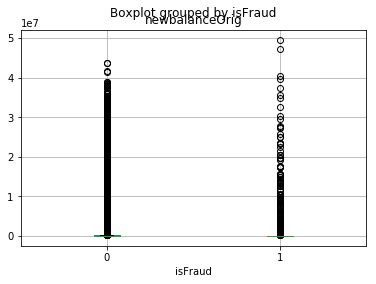

In [123]:
df.boxplot(column='newbalanceOrig',by = "isFraud")

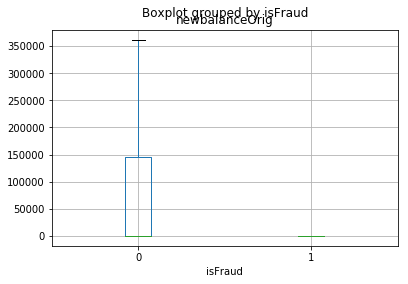

In [64]:
df.boxplot(column='newbalanceOrig',by="isFraud",showfliers=False) #Quitamos el efecto de los outliers

No se aprecia diferencia.

### 0.4.6. isFraud VS DifbalanceOrig

In [248]:
df[df.isFraud == 1].difbalanceOrig.describe()

count    8.213000e+03
mean    -1.457275e+06
std      2.396099e+06
min     -1.000000e+07
25%     -1.503035e+06
50%     -4.363175e+05
75%     -1.245826e+05
max      0.000000e+00
Name: difbalanceOrig, dtype: float64

In [249]:
df[df.isFraud == 0].difbalanceOrig.describe()

count    6.354407e+06
mean     2.314152e+04
std      1.062233e+05
min     -4.164236e+06
25%     -1.010213e+04
50%      0.000000e+00
75%      0.000000e+00
max      1.915268e+06
Name: difbalanceOrig, dtype: float64

In [250]:
min(df[df.isFraud == 0].difbalanceOrig)

-4164236.3099999987

In [251]:
min(df[df.isFraud == 1].difbalanceOrig)

-10000000.000000004

In [252]:
max(df[df.isFraud == 0].difbalanceOrig)

1915267.9000000022

In [253]:
max(df[df.isFraud == 1].difbalanceOrig)

0.0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1139b22b0>,
      dtype=object)

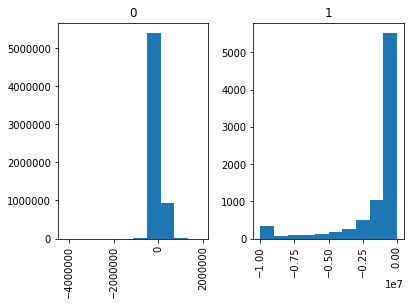

In [254]:
df.hist(column = "difbalanceOrig", by = "isFraud",bins=10)

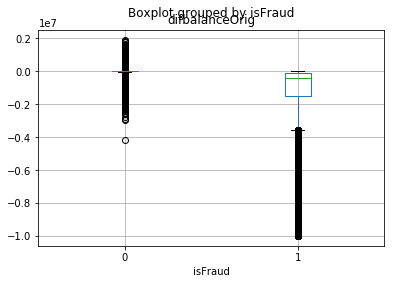

In [255]:
df.boxplot(column='difbalanceOrig',by = "isFraud")

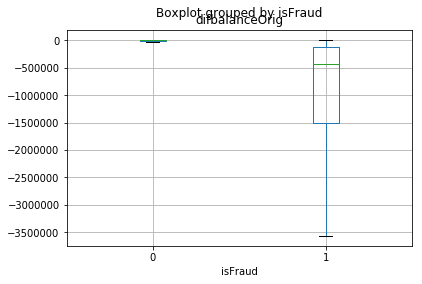

In [63]:
df.boxplot(column='difbalanceOrig',by="isFraud",showfliers=False) #Quitamos el efecto de los outliers

### 0.4.7. isFraud VS DifbalanceOrig_cat

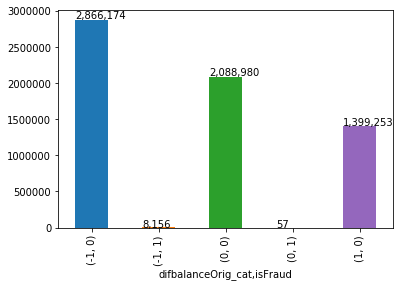

In [256]:
graf = df.groupby(['difbalanceOrig_cat', 'isFraud']).size().plot(kind='bar')
for p in graf.patches:
    graf.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

EN el gráfico se muestra **(diferencia entre saldo final e inicial, fraude)**.
Podemos observar:
 - No hay fraude en cuando la diferencia entre el saldo final e inicial es mayor que 0.
 - Hay más fraude cuando la diferencia entre el saldo final e inicial es menor que 0, que cuando es 0.
 

### 0.4.8. isFraud VS NameDest

Vamos a ver la diferencia entre comerciantes y no comerciantes en los destinatarios (recordemos que los comerciantes son lo que empiezan con M)

Número de 0's (no fraudes) 2151495
Número de 1's (fraudes) 0


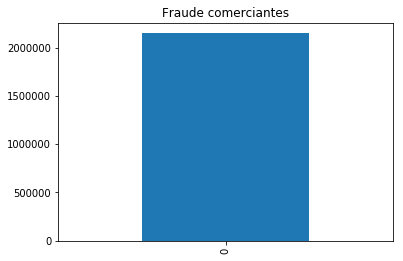

In [68]:
df_M.isFraud.value_counts().sort_index().plot(kind='bar', title="Fraude comerciantes")
print("Número de 0's (no fraudes) " + str(len(df_M[df_M.isFraud == 0])))
print("Número de 1's (fraudes) " + str(len(df_M[df_M.isFraud == 1])))

Número de 0's (no fraudes) 4202912
Número de 1's (fraudes) 8213


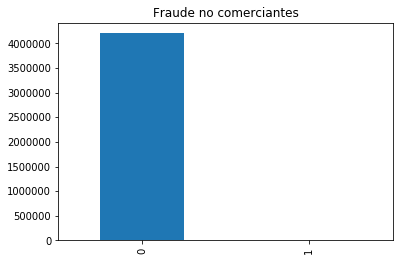

In [70]:
df_noM.isFraud.value_counts().sort_index().plot(kind='bar', title="Fraude no comerciantes")
print("Número de 0's (no fraudes) " + str(len(df_noM[df_noM.isFraud == 0])))
print("Número de 1's (fraudes) " + str(len(df_noM[df_noM.isFraud == 1])))

### 0.4.9. isFraude VS oldbalanceDest

In [124]:
df[df.isFraud == 1].oldbalanceDest.describe()

count    8.213000e+03
mean     5.442496e+05
std      3.336421e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.478287e+05
max      2.362305e+08
Name: oldbalanceDest, dtype: float64

In [125]:
df[df.isFraud == 0].oldbalanceDest.describe()

count    6.354407e+06
mean     1.101421e+06
std      3.399202e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.333118e+05
75%      9.441446e+05
max      3.560159e+08
Name: oldbalanceDest, dtype: float64

In [126]:
max(df[df.isFraud == 0].oldbalanceDest)

356015889.35

In [127]:
max(df[df.isFraud == 1].oldbalanceDest)

236230516.82

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10e406be0>,
      dtype=object)

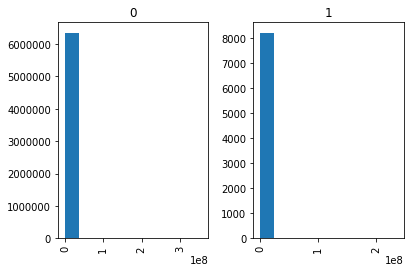

In [128]:
df.hist(column = "oldbalanceDest", by = "isFraud",bins=10)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10e0b6c18>,
      dtype=object)

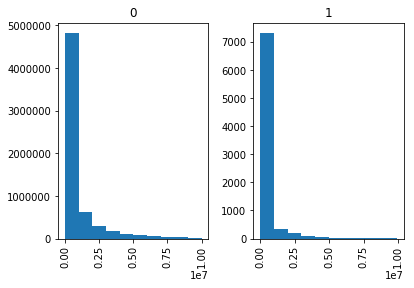

In [129]:
df[df['oldbalanceDest']< 10000000].hist(column = "oldbalanceDest", by = "isFraud",bins=10)

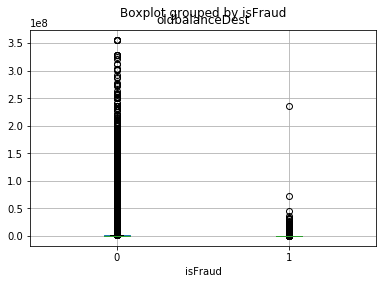

In [130]:
df.boxplot(column='oldbalanceDest',by = "isFraud")

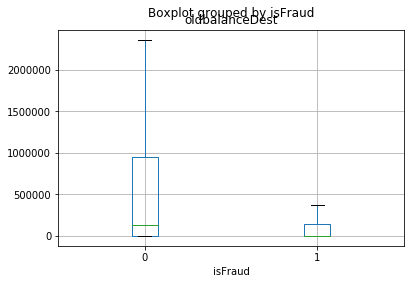

In [62]:
df.boxplot(column='oldbalanceDest',by="isFraud",showfliers=False) #Quitamos el efecto de los outliers

### 0.4.10. isFraude VS newbalanceDest

In [131]:
df[df.isFraud == 1].newbalanceDest.describe()

count    8.213000e+03
mean     1.279708e+06
std      3.908817e+06
min      0.000000e+00
25%      0.000000e+00
50%      4.676420e+03
75%      1.058725e+06
max      2.367265e+08
Name: newbalanceDest, dtype: float64

In [132]:
df[df.isFraud == 0].newbalanceDest.describe()

count    6.354407e+06
mean     1.224926e+06
std      3.673816e+06
min      0.000000e+00
25%      0.000000e+00
50%      2.148817e+05
75%      1.111975e+06
max      3.561793e+08
Name: newbalanceDest, dtype: float64

In [133]:
max(df[df.isFraud == 0].newbalanceDest)

356179278.92

In [134]:
max(df[df.isFraud == 1].newbalanceDest)

236726494.66

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10e690ef0>,
      dtype=object)

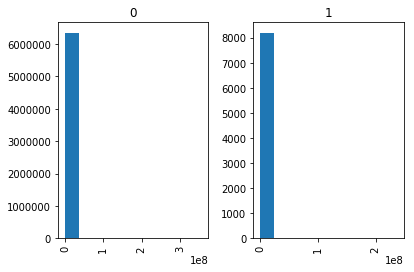

In [135]:
df.hist(column = "newbalanceDest", by = "isFraud",bins=10)

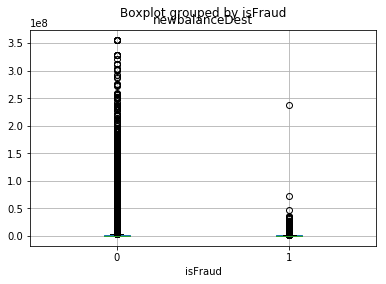

In [136]:
df.boxplot(column='newbalanceDest',by = "isFraud")

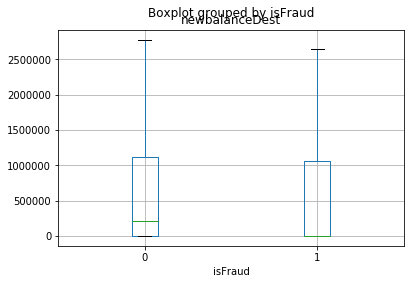

In [61]:
df.boxplot(column='newbalanceDest',by="isFraud",showfliers=False) #Quitamos el efecto de los outliers

No se aprecia gran diferencia.

### 0.4.11. isFraud VS DifbalanceDest

In [257]:
df[df.isFraud == 1].difbalanceDest.describe()

count    8.213000e+03
mean     7.354580e+05
std      1.856984e+06
min     -3.152261e+05
25%      0.000000e+00
50%      0.000000e+00
75%      4.452574e+05
max      1.491511e+07
Name: difbalanceDest, dtype: float64

In [258]:
df[df.isFraud == 0].difbalanceDest.describe()

count    6.354407e+06
mean     1.235048e+05
std      8.104223e+05
min     -1.306083e+07
25%      0.000000e+00
50%      0.000000e+00
75%      1.489826e+05
max      1.056878e+08
Name: difbalanceDest, dtype: float64

In [259]:
min(df[df.isFraud == 0].difbalanceDest)

-13060826.21

In [260]:
min(df[df.isFraud == 1].difbalanceDest)

-315226.07

In [261]:
max(df[df.isFraud == 0].difbalanceDest)

105687838.82000001

In [262]:
max(df[df.isFraud == 1].difbalanceDest)

14915111.47

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1180d7588>,
      dtype=object)

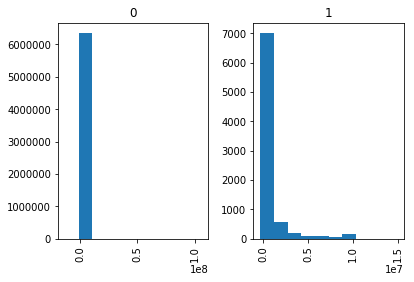

In [263]:
df.hist(column = "difbalanceDest", by = "isFraud",bins=10)

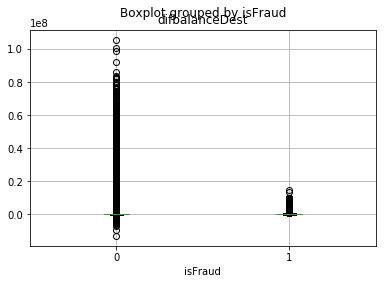

In [264]:
df.boxplot(column='difbalanceDest',by = "isFraud")

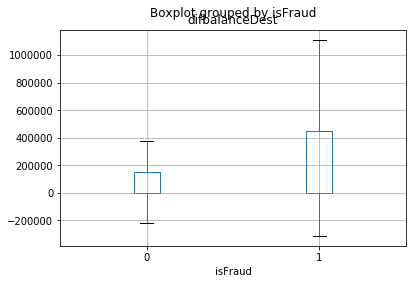

In [60]:
df.boxplot(column='difbalanceDest',by="isFraud",showfliers=False) #Quitamos el efecto de los outliers

### 0.4.12. isFraud VS DifbalanceDest_cat

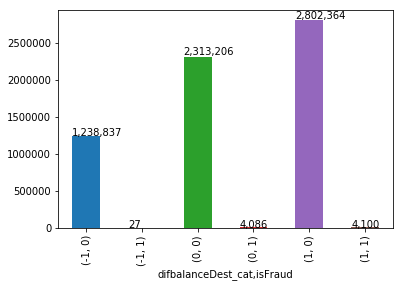

In [265]:
graf = df.groupby(['difbalanceDest_cat', 'isFraud']).size().plot(kind='bar')
for p in graf.patches:
    graf.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

EN el gráfico se muestra **(diferencia entre saldo final e inicial del destinatario, fraude)**.
Podemos observar:
 - Hay menos fraude cuando la diferencia entre el saldo final e inicial es menor que 0, que cuando es 0 o mayor que 0.
 

## 0.5. Correlaciones

In [286]:
df.dtypes

step                    int64
type                   object
amount                float64
nameOrig               object
oldbalanceOrg         float64
newbalanceOrig        float64
nameDest               object
oldbalanceDest        float64
newbalanceDest        float64
isFraud                 int64
isFlaggedFraud          int64
hour_day                int64
difbalanceOrig        float64
difbalanceOrig_cat      int64
difbalanceDest        float64
difbalanceDest_cat      int64
type_cat                int64
dtype: object

#### Correlaciones de las variables originales

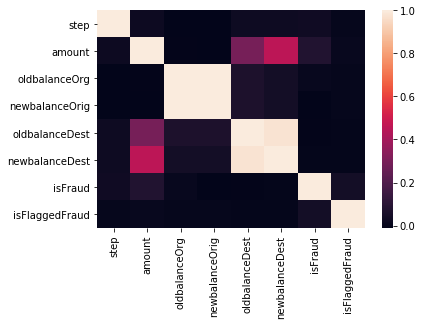

In [307]:
sns.heatmap(df_orig.corr()) #Correlaciones de las variables originales

In [308]:
df1 = df[['step','hour_day','type_cat','amount','difbalanceOrig_cat','difbalanceDest_cat','isFraud']]

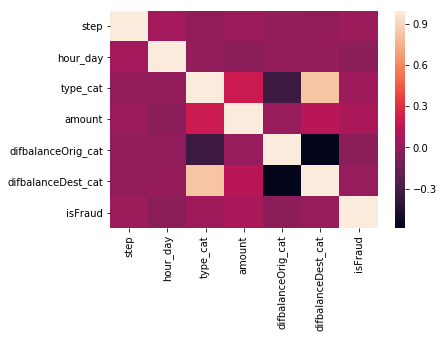

In [309]:
sns.heatmap(df1.corr())

Vemos que la variable **type_cat** y **difbalanceDest_cat** están correlacionadas.

In [364]:
df2 = df[['step','hour_day','type_num','type_cat','amount','difbalanceOrig','difbalanceDest','isFraud']]


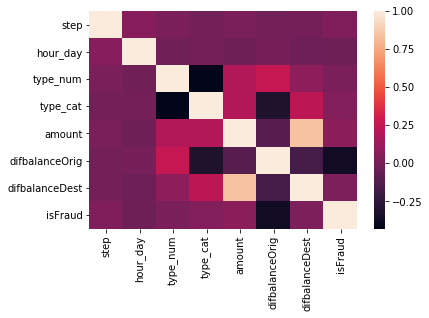

In [365]:
sns.heatmap(df2.corr())

Al cambiar la variable categórica **difbalanceDest_cat** por la continua **difbalanceDest**, ahora la correlación está entre **difbalanceDest** y **amount**.

## 0.6. Quitar registros

Como comentaba a la hora de analizar *type*, se observaba que de las 5 posible categoría que toma la variable que son:
- Payment
- Transfer
- Cash_out
- Debit
- Cash_in

tan solo dos de ellas presentan casos de fraude, por lo que solo nos quedaremos con estas dos categorías que si que presentan fraude, que son:
- Cash_out
- Transfer

In [37]:
df2 = df[df['type_cat']==1]

Hagamos ahora un pequeño análisis de estos datos

In [41]:
df2.shape

(2770409, 16)

Ahora pasamos a tener casi 3Millones de datos

Veamos ahora el porcentaje de fraude

In [13]:
print('Ahora hay un ',"{0:.4f}".format(100 * len(df2[df2['isFraud'] == 1]) / len(df2)),'% de fraude')

Ahora hay un  0.2965 % de fraude


Pese a que hay más proporción de fraude que antes, sigue siendo muy poco. Por eso aplicaremos la técnica estadística de bajomuestreo.

In [61]:
df2.reset_index(drop=True, inplace=True)

## 0.7. Bajomuestreo

In [63]:
porcentaje_fraude = 0.3 #Porcentaje de casos de fraude que queremos que haya en la muestra
num_fraude = len(df2[df2.isFraud == 1]) #Número de registros de fraude
ind_fraude = df2[df2.isFraud == 1].index.values #Índices del dataframe de los casos de fraude
ind_nofraude = df2[df2.isFraud == 0].index.values #Índices del dataframe de los casos de NO fraude
#Cogemos aletarioamente el (1-porcentaje de fraude)% de índices de los NO fraude
ind_aleatorio_nofraude = np.random.choice(ind_nofraude, round(num_fraude / porcentaje_fraude * (1 - porcentaje_fraude )), replace = False)
ind_aleatorio_nofraude = np.array(ind_aleatorio_nofraude)
#Unimos los índices de fraude con los aleatorios de fraude que acabamos de calcular
ind_bajomuestreo = np.concatenate([ind_fraude,ind_aleatorio_nofraude])
df_bajomuestreo = df2.iloc[ind_bajomuestreo, :]#Seleccionamos los registros de los índices que acabamos de sacar.


In [65]:
df_nobajomuestreo = df2.drop(list(df_bajomuestreo.index))

Así tendremos un nuevo data frame donde el porcentaje de fraude es mayor que el 0.12% que teníamos antes

In [74]:
print("Ahora tenemos ", str(len(df_bajomuestreo)), " registros")
print("de los cuales un ", "{0:.2f}".format(100*len(df_bajomuestreo[df_bajomuestreo.isFraud == 1])/len(df_bajomuestreo)), "% es fraude")

Ahora tenemos  27377  registros
de los cuales un  30.00 % es fraude


## 0.8. Guardamos conjunto de datos

In [68]:
df.to_csv("df_new.csv")

In [75]:
df_bajomuestreo.to_csv("df_bajomuestreo.csv")

In [76]:
df_nobajomuestreo.to_csv("df_nobajomuestreo.csv")